In [ ]:
# install library
install.packages(c("ggplot2"))
install.packages("cowplot")
install.packages("patchwork")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# call the library
library(ggplot2)
library(dplyr)
library(cowplot)
library(scales)
library(patchwork)

#Figure 1

In [ ]:
##########
# plot_mortality_vs_incidence - various continent
##########

# define function plot_mortality_vs_incidence
plot_mortality_vs_incidence <- function(incidence_file, mortality_file, group_file, age_range, plot_output_file, table_output_file) {

  # read in the data
  incidence <- read.csv(incidence_file)
  mortality <- read.csv(mortality_file)
  group <- read.csv(group_file)

  # sort the data
  sorted_group <- group[order(group$Population), ]
  sorted_incidence <- incidence[order(incidence$Population), ]
  sorted_mortality <- mortality[order(mortality$Population), ]

  # merge the data
  merged_IM <- merge(sorted_incidence, sorted_mortality, by = "Population", all = TRUE)
  group_IM <- merge(merged_IM, sorted_group, by = "Population", all.x = TRUE)

  # calculate the slope
  slope_data <- group_IM %>%
    group_by(Grouped.by) %>%
    summarise("{age_range}_slope" := ifelse(sum(!is.na(ASR..World..per.100.000.y)) > 0,
                                             coef(lm(ASR..World..per.100.000.y ~ ASR..World..per.100.000.x))[2],
                                             NA)) %>%
    rename(Continents = Grouped.by)

  # plot the mortality vs incidence
  # define custom colors(feel free to change based on your preference)
  my_colors <- c("#9467BD", "#8C564B", "#E377C2", "#7F7F7F", "#BCBD22", "#17BECF")

  # plot with custom colors and smoothed lines for Africa and Europe
  p <- ggplot(group_IM, aes(x=ASR..World..per.100.000.x, y=ASR..World..per.100.000.y, shape=Grouped.by, color=Grouped.by)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE) +  # add smoothed lines (slope) using linear regression
    labs(title=paste("Mortality vs Incidence - ASR (World) per 100,000\nBoth sexes, age", age_range, "in 2022"),
         x="Incidence", y = "Mortality",
         shape="Continents", color="Continents") +
    scale_color_manual(values = my_colors) +  # use the defined custom colors
    scale_shape_manual(values = c(5, 6, 7, 8, 9, 10))+
     theme_minimal() +
    theme(
      legend.position = "right",
      legend.title = element_text(size=10),
      legend.text = element_text(size=8),
      plot.title = element_text(hjust = 0.5),
      panel.grid.major = element_blank(),  # remove major grid lines
      panel.grid.minor = element_blank(),  # remove minor grid lines
      panel.border = element_blank(),  # remove panel border
      axis.line = element_line()  # keep axis lines
    )


  # save the plot to a file
  ggsave(plot_output_file, plot = p, width = 9, height = 6, dpi = 1000)

  # save the slope data to a CSV file
  write.csv(slope_data, table_output_file, row.names = FALSE)

  return(list(plot = p, slope_data = slope_data, plot_output_file = plot_output_file, table_output_file = table_output_file))
}

# for age group 0-39
plot_mortality_vs_incidence("/content/2022-incidence-0-39.csv", "/content/2022-mortality-0-39.csv", "/content/2022-mortality:incidence-allAge.csv", "[0, 39]", "[0,39]_mrtality_vs_incidence.png", "[0,39]_mrtality_vs_incidence.csv")

# for age group 40-85+
plot_mortality_vs_incidence("/content/2022-incidence-40-85+.csv", "/content/2022-mortality-40-85+.csv", "/content/2022-mortality:incidence-allAge.csv", "[40, 85+]", "[40,85+]_mrtality_vs_incidence.png", "[40,85+]_mrtality_vs_incidence.csv")

# for age group 0-85+
plot_mortality_vs_incidence("/content/2022-incidence-allAge.csv", "/content/2022-mortality-allAge.csv", "/content/2022-mortality:incidence-allAge.csv", "[0, 85+]", "[0,85+]_mrtality_vs_incidence.png", "[0,85+]_mrtality_vs_incidence.csv")

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


$plot

$slope_data
# A tibble: 4 × 2
  Continents    `[0, 39]_slope`
  <fct>                   <dbl>
1 Low HDI               0.493  
2 Medium HDI            0.351  
3 High HDI              0.195  
4 Very high HDI         0.00993

$plot_output_file
[1] "[0,39]_mrtality_vs_incidence_HDI.png"

$table_output_file
[1] "[0,39]_mrtality_vs_incidence_HDI.csv"


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


$plot

$slope_data
# A tibble: 4 × 2
  Continents    `[40, 85+]_slope`
  <fct>                     <dbl>
1 Low HDI                  0.577 
2 Medium HDI               0.396 
3 High HDI                 0.371 
4 Very high HDI            0.0222

$plot_output_file
[1] "[40,85+]_mrtality_vs_incidence_HDI.png"

$table_output_file
[1] "[40,85+]_mrtality_vs_incidence_HDI.csv"


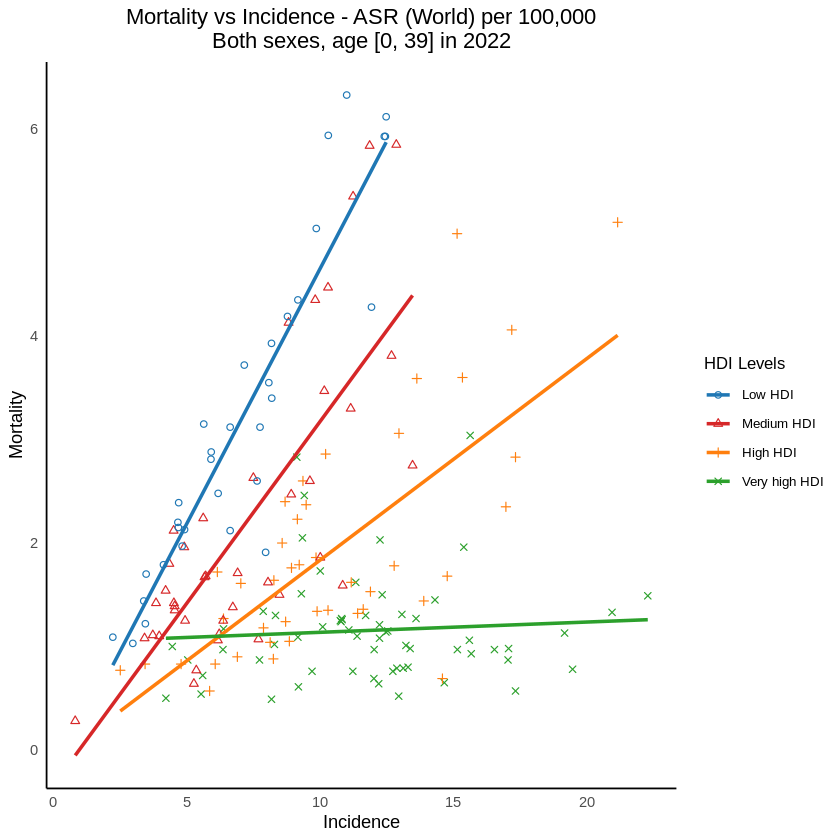

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


$plot

$slope_data
# A tibble: 4 × 2
  Continents    `[0, 85+]_slope`
  <fct>                    <dbl>
1 Low HDI                 0.564 
2 Medium HDI              0.396 
3 High HDI                0.369 
4 Very high HDI           0.0144

$plot_output_file
[1] "[0,85+]_mrtality_vs_incidence_HDI.png"

$table_output_file
[1] "[0,85+]_mrtality_vs_incidence_HDI.csv"


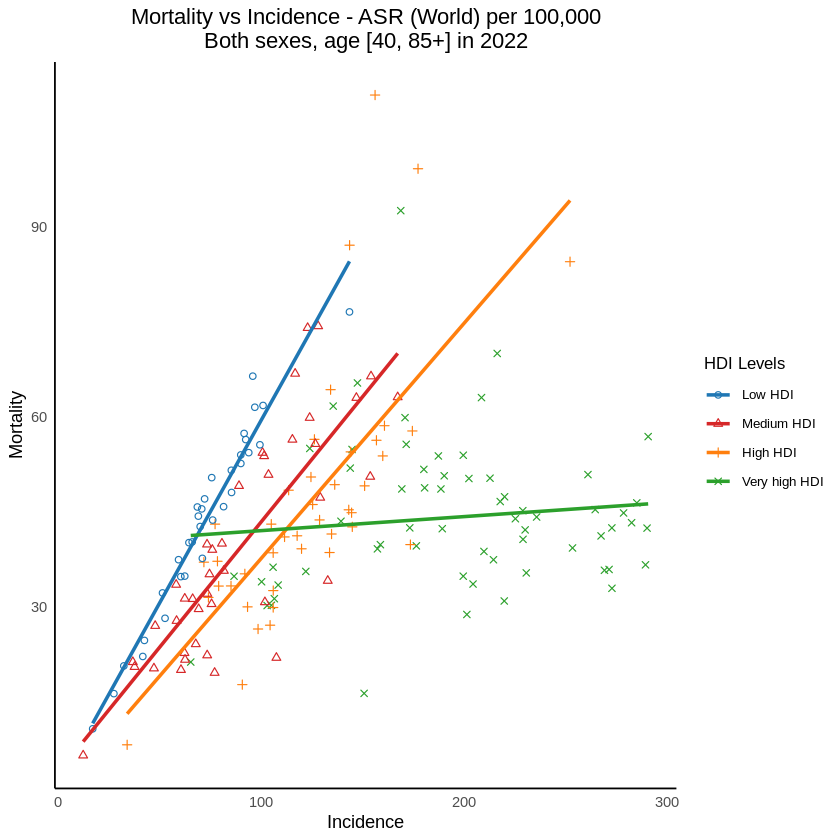

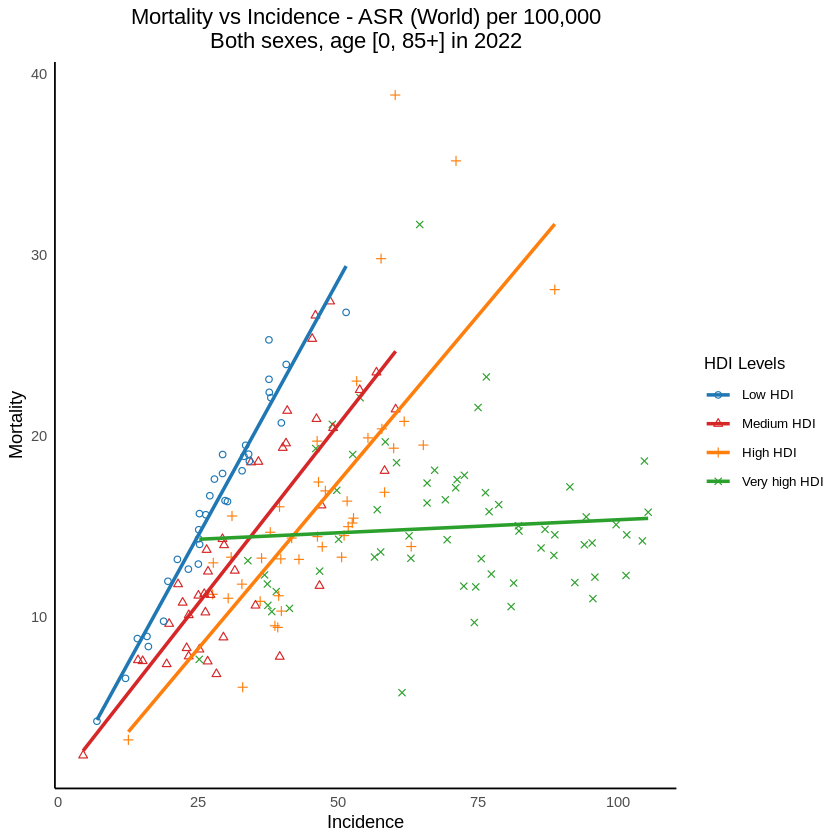

In [ ]:
##########
# plot_mortality_vs_incidence by various HDI
##########
# define the function plot_mortality_vs_incidence_HDI
plot_mortality_vs_incidence_HDI <- function(input, age_range, plot_output_file, table_output_file) {
  # read in the data
  input <- read.csv(input)

  # remove the non-applicable data
  input_cleaned <- subset(input, Grouped.by != "Not applicable")

  # define the desired order of levels for Grouped.by
  desired_order <- c("Low HDI", "Medium HDI", "High HDI", "Very high HDI")  # Adjust the order as needed

  # convert Grouped.by to a factor with the desired order
  input_cleaned$Grouped.by <- factor(input_cleaned$Grouped.by, levels = desired_order)

  # calculate the slope
  slope_data <- input_cleaned %>%
    group_by(Grouped.by) %>%
    summarise("{age_range}_slope" := ifelse(sum(!is.na(Mortality...ASR..World.)) > 0,
                                             coef(lm(Mortality...ASR..World. ~ Incidence...ASR..World.))[2],
                                             NA)) %>%
    rename(Continents = Grouped.by)

  # plot the mortality vs incidence
  # define custom colors
  my_colors <- c("#1F77B4","#D62728", "#FF7F0E", "#2CA02C")

  # ggplot code with custom colors and smoothed lines for Africa and Europe
  p <- ggplot(input_cleaned, aes(x=Incidence...ASR..World., y=Mortality...ASR..World., shape=Grouped.by, color=Grouped.by)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE) +  # add smoothed lines (slope) using linear regression
    labs(title=paste("Mortality vs Incidence - ASR (World) per 100,000\nBoth sexes, age", age_range, "in 2022"),
         x="Incidence", y = "Mortality",
         shape="HDI Levels", color="HDI Levels") +
    scale_color_manual(values = my_colors) +  # use custom colors
    scale_shape_manual(values = c(1, 2, 3, 4))+
     theme_minimal() +
    theme(
      legend.position = "right",
      legend.title = element_text(size=10),
      legend.text = element_text(size=8),
      plot.title = element_text(hjust = 0.5),
      panel.grid.major = element_blank(),  # remove major grid lines
      panel.grid.minor = element_blank(),  # remove minor grid lines
      panel.border = element_blank(),  # remove panel border
      axis.line = element_line()  # keep axis lines
    )


  # save the plot to a file
  ggsave(plot_output_file, plot = p, width = 8, height = 6, dpi = 1000)

  # save the slope data to a CSV file
  write.csv(slope_data, table_output_file, row.names = FALSE)

  return(list(plot = p, slope_data = slope_data, plot_output_file = plot_output_file, table_output_file = table_output_file))
}

# for age group 0-39
plot_mortality_vs_incidence_HDI("/content/2022-HDI-0-39.csv", "[0, 39]", "[0,39]_mrtality_vs_incidence_HDI.png", "[0,39]_mrtality_vs_incidence_HDI.csv")

# for age group 40-85+
plot_mortality_vs_incidence_HDI("/content/2022-HDI-40-85+.csv", "[40, 85+]", "[40,85+]_mrtality_vs_incidence_HDI.png", "[40,85+]_mrtality_vs_incidence_HDI.csv")

# # for age group 0-85+
plot_mortality_vs_incidence_HDI("/content/2022-HDI-0-85+.csv", "[0, 85+]", "[0,85+]_mrtality_vs_incidence_HDI.png", "[0,85+]_mrtality_vs_incidence_HDI.csv")

In [ ]:
# Create sample data
data <- data.frame(
  X = c("A", "B", "C", "D", "E"),
  Y1 = c(10, 15, 20, 25, 30),  # Values for the first y-axis
  Y2 = c(5, 10, 15, 20, 25)   # Values for the second y-axis
)

# Plotting
ggplot(data, aes(x = X)) +
  geom_point(aes(y = Y1, color = "Y1"), size = 3) +  # Dot plot for Y1
  geom_point(aes(y = Y2 * 2, color = "Y2"), size = 3) +  # Dot plot for Y2
  scale_y_continuous(
    name = "Y1",
    sec.axis = sec_axis(~./2, name = "Y2")  # Create a secondary axis for Y2
  ) +
  labs(color = "Variables") +
  theme_minimal()

#Figure 2

In [ ]:
##########
# plot_future trends - various HDI
##########

# define the function future_trends_prediction_HDI
future_trends_prediction_HDI <- function(incidence_file, mortality_file, output_prefix, title_variable) {
  incidence <- read.csv(incidence_file)
  mortality <- read.csv(mortality_file)

  # assuming both data frames have been prepared similarly
  # convert columns to appropriate data types if needed
  incidence$Year <- as.numeric(incidence$Year)
  incidence$Prediction <- as.numeric(incidence$Prediction)
  incidence$Population <- factor(incidence$Population, levels = unique(incidence$Population))

  mortality$Year <- as.numeric(mortality$Year)
  mortality$Prediction <- as.numeric(mortality$Prediction)
  mortality$Population <- factor(mortality$Population, levels = unique(mortality$Population))

  incidence <- incidence %>% mutate(sequence = row_number())
  mortality <- mortality %>% mutate(sequence = row_number())

  # join DataFrame A to DataFrame B based on key_column
  result <- left_join(incidence, mortality[, c("sequence", "Prediction")], by = "sequence")
  result <- result[complete.cases(result), ]

  max_y1 <- max(result$Prediction.x)

  custom_colors <- c("#9467BD", "#8C564B", "#E377C2", "#7F7F7F") # for HDI

  q <- ggplot(result, aes(x = Year, color = Population, linetype = "Prediction Type")) +
    geom_point(aes(y = Prediction.x), alpha = 0.5) +
    geom_smooth(aes(y = Prediction.x, linetype = "Incidence"), method = "loess", se = FALSE) +
    geom_point(aes(y = Prediction.y)) +
    geom_smooth(aes(y = Prediction.y, linetype = "Mortality"), method = "loess", se = FALSE) +
    scale_color_discrete(name = "HDI Levels") +
    scale_linetype_manual(
      name = "Prediction Type",
      values = c("Incidence" = "solid", "Mortality" = "dotted"),
      labels = c("Incidence", "Mortality")
    ) +
    scale_y_continuous(
      name = "Estimated Numbers",
      limits = c(0, max_y1),
      labels = comma
    ) +
    theme_minimal() +
    theme(
      legend.position = "right",
      legend.title = element_text(size=10),
      legend.text = element_text(size=8),
      plot.title = element_text(hjust = 0.5, size = 10),
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      panel.border = element_blank(),
      axis.line = element_line()
    ) +
      ggtitle(paste("Estimated Numbers of New Cases and Deaths, \nfrom 2022 to 2050, Both Sexes, Age", title_variable))

  # calculate correlation for shared color using Spearman's rank correlation
  correlation_spearman <- result %>%
    group_by(Population) %>%
    summarise(
      correlation_spearman = cor.test(Prediction.x, Prediction.y, method = "spearman")$estimate
    )

  # calculate correlation for shared color using Fisher's exact test
Pvalue_spearman <- result %>%
  group_by(Population) %>%
  summarise(
    p_value = cor.test(Prediction.x, Prediction.y, method = "spearman")$p.value
  )


  # merge correlation data frames
  merged_correlation_data <- merge(correlation_spearman, Pvalue_spearman, by = "Population")

  # print merged correlation data
  print(merged_correlation_data)

  # save the plot to a file
  png_file <- paste0(output_prefix, "_plot.png")
  ggsave(png_file, plot = q, width = 5.05, height = 6, dpi = 1000)

  # save the slope data to a CSV file
  csv_file <- paste0(output_prefix, "_correlation.csv")
  write.csv(merged_correlation_data, csv_file, row.names = FALSE)
}

In [ ]:
# run the function future_trends_prediction_HDI:
# for age group 0-39
future_trends_prediction_HDI("/content/incidence_0_39_HDI.csv", "/content/mortality_0_39_HDI.csv", "0_39_HDI", "[0-39]")

# for age group 40-85
future_trends_prediction_HDI("/content/incidence_0_85_HDI.csv", "/content/mortality_0_85_HDI.csv", "0_85_HDI", "[0-85+]")

# for age group 0-85
future_trends_prediction_HDI("/content/incidence_40_85_HDI.csv", "/content/mortality_40_85_HDI.csv", "40_85_HDI", "[40-85+]")


          Population correlation_spearman      p_value
1   High HDI country                    1 0.0003968254
2    Low HDI country                    1 0.0003968254
3 Medium HDI country                    1 0.0003968254
4   Very HDI country                    1 0.0003968254


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


          Population correlation_spearman      p_value
1   High HDI country                    1 0.0003968254
2    Low HDI country                    1 0.0003968254
3 Medium HDI country                    1 0.0003968254
4   Very HDI country                    1 0.0003968254


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


          Population correlation_spearman      p_value
1   High HDI country                    1 0.0003968254
2    Low HDI country                    1 0.0003968254
3 Medium HDI country                    1 0.0003968254
4   Very HDI country                    1 0.0003968254


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


In [ ]:
##########
# plot_future trends - various continents
##########

# define the function future_trends_prediction_con
future_trends_prediction_con <- function(incidence_file, mortality_file, output_prefix, title_variable) {
  incidence <- read.csv(incidence_file)
  mortality <- read.csv(mortality_file)

  # assuming both data frames have been prepared similarly
  # convert columns to appropriate data types if needed
  incidence$Year <- as.numeric(incidence$Year)
  incidence$Prediction <- as.numeric(incidence$Prediction)
  incidence$Population <- factor(incidence$Population, levels = unique(incidence$Population))

  mortality$Year <- as.numeric(mortality$Year)
  mortality$Prediction <- as.numeric(mortality$Prediction)
  mortality$Population <- factor(mortality$Population, levels = unique(mortality$Population))

  incidence <- incidence %>% mutate(sequence = row_number())
  mortality <- mortality %>% mutate(sequence = row_number())

  # join DataFrame A to DataFrame B based on key_column
  result <- left_join(incidence, mortality[, c("sequence", "Prediction")], by = "sequence")
  result <- result[complete.cases(result), ]

  max_y1 <- max(result$Prediction.x)

  custom_colors <- c("#BCBD22", "#17BECF", "#B25BAA", "#FF7F0E", "#1F77B4", "#2CA02C")

  q <- ggplot(result, aes(x = Year, color = Population, linetype = "Prediction Type")) +
    geom_point(aes(y = Prediction.x), alpha = 0.5) +
    geom_smooth(aes(y = Prediction.x, linetype = "Incidence"), method = "loess", se = FALSE) +
    geom_point(aes(y = Prediction.y)) +
    geom_smooth(aes(y = Prediction.y, linetype = "Mortality"), method = "loess", se = FALSE) +
    scale_linetype_manual(
      name = "Prediction Type",
      values = c("Incidence" = "solid", "Mortality" = "dotted"), # for conteninent
      labels = c("Incidence", "Mortality")
    ) +
    scale_color_discrete(name = "Continents") +
    scale_y_continuous(
      name = "Estimated Numbers",
      limits = c(0, max_y1),
      labels = comma
    ) +
    theme_minimal() +
    theme(
      legend.position = "right",
      legend.title = element_text(size=10),
      legend.text = element_text(size=8),
      plot.title = element_text(hjust = 0.5, size = 10),
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      panel.border = element_blank(),
      axis.line = element_line()
    ) +
    ggtitle(paste("Estimated Numbers of New Cases and Deaths, \nfrom 2022 to 2050, Both Sexes, Age", title_variable))

  # calculate correlation for shared color using Spearman's rank correlation
  correlation_spearman <- result %>%
    group_by(Population) %>%
    summarise(
      correlation_spearman = cor.test(Prediction.x, Prediction.y, method = "spearman")$estimate
    )

  # calculate correlation for shared color using Fisher's exact test
  Pvalue_spearman <- result %>%
    group_by(Population) %>%
    summarise(
      p_value = cor.test(Prediction.x, Prediction.y, method = "spearman")$p.value
    )


  # merge correlation data frames
  merged_correlation_data <- merge(correlation_spearman, Pvalue_spearman, by = "Population")
  # Print merged correlation data
  print(merged_correlation_data)

  # save the plot to a file
  png_file <- paste0(output_prefix, "_plot.png")
  ggsave(png_file, plot = q, width = 6, height = 6, dpi = 1000)

  # save the slope data to a CSV file
  csv_file <- paste0(output_prefix, "_correlation.csv")
  write.csv(merged_correlation_data, csv_file, row.names = FALSE)
}


In [ ]:
# run the function future_trends_prediction_con:
# for age group 0-39
future_trends_prediction_con("/content/incidence_0_39_con.csv", "/content/mortality_0_39_con.csv", "0_39_con", "[0-39]")

# for age group 40-85
future_trends_prediction_con("/content/incidence_0_85_con.csv", "/content/mortality_0_85_con.csv", "0_85_con", "[0-85+]")

# for age group 0-85
future_trends_prediction_con("/content/incidence_40_85_con.csv", "/content/mortality_40_85_con.csv", "40_85_con", "[40-85+]")


                       Population correlation_spearman      p_value
1                          Africa            1.0000000 0.0003968254
2                            Asia            0.9285714 0.0067460317
3                          Europe            0.9642857 0.0027777778
4 Latin America and the Caribbean            0.9642857 0.0027777778
5                Northern America            1.0000000 0.0003968254
6                         Oceania            1.0000000 0.0003968254


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


                       Population correlation_spearman      p_value
1                          Africa            1.0000000 0.0003968254
2                            Asia            1.0000000 0.0003968254
3                          Europe            0.8928571 0.0123015873
4 Latin America and the Caribbean            1.0000000 0.0003968254
5                Northern America            1.0000000 0.0003968254
6                         Oceania            1.0000000 0.0003968254


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


                       Population correlation_spearman      p_value
1                          Africa            1.0000000 0.0003968254
2                            Asia            1.0000000 0.0003968254
3                          Europe            0.8928571 0.0123015873
4 Latin America and the Caribbean            1.0000000 0.0003968254
5                Northern America            1.0000000 0.0003968254
6                         Oceania            1.0000000 0.0003968254


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


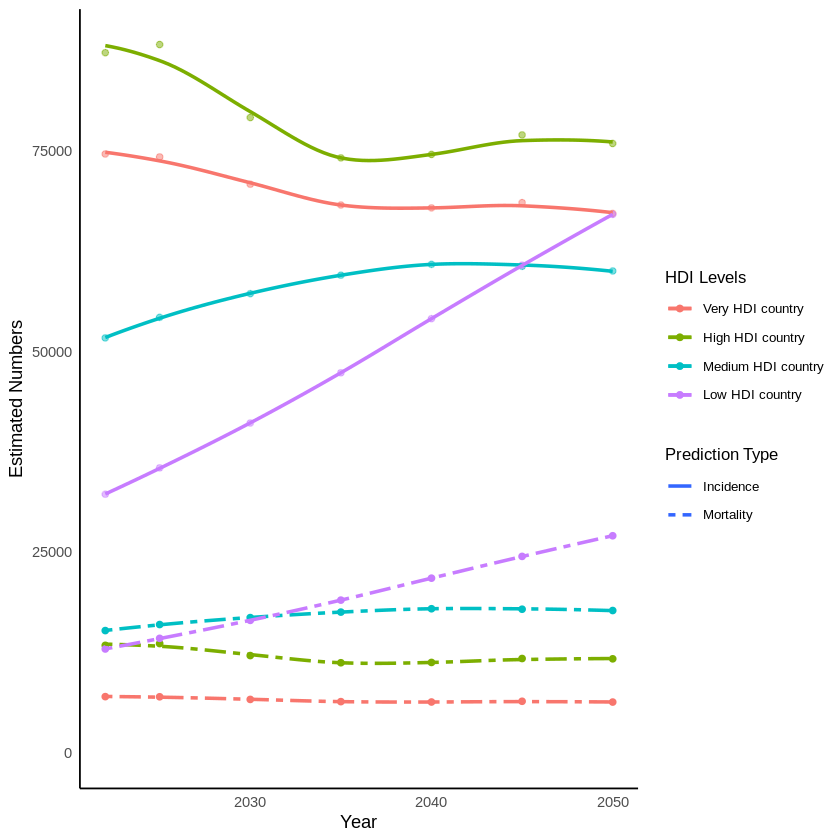

In [ ]:
# example figure output for age group [0-39]
q